# Subaru Ratings: Highest Rated Subaru Model/Transmission 
## Compare consumer ratings of Subaru Models vs. The year they were rated

In [38]:
NAME = "Ronald Durham"
COLLABORATORS = ""

### About the Project

The goal of this project is to give a predicted consumer vehicle rating for a consumer looking to buy a certain year/model of Subaru. The Subaru community is full of enthusiasts from many different walks of life and being able to use this model for other brands would be beneficial when looking to buy a vehicle and determine if it would be better to buy an older model or a newer model based on consumer reviews of the vehicles over time. This project would classify as a regression problem. 

A vast amount of history on the Subaru Models looked at in this assignment can be found here:

https://en.wikipedia.org/wiki/Subaru_Impreza

### The Data

For this project I chose to use the "Edmunds Consumer Car Ratings and Reviews" data found on Kaggle at the following address:

https://www.kaggle.com/ankkur13/edmundsconsumer-car-ratings-and-reviews

The data listed goes into much detail about many other vehicle makes, but I am most interested in the data regarding Subaru vehicles. The data is a bit messy and is currently comprised of the following attributes:

- Review Date
- Author Name
- Vehicle Title
- Review Title
- Review
- Rating

The dataset contains 6564 reviews on multiple models of Subaru vehicles. Within the vehicle titles, there is interesting data as to the year, model, and transmission type for the vehicle being reviewed. This is interesting to me where the rest of the information regarding the specific details of the reviews themselves are less important. I will aim to clean the data such that I can narrow down the messy data into more workable attributes such as:

- Vehicle Year (discrete int)
- Vehicle Make (All should be Subaru) (String)
- Vehicle Model (String)
- Turbo? (String) (Turbo =  Vehicle has a turbo, N/A = Vehicle is Naturally Aspirated)
- Transmission (String, 4A, 5A, 5M, 6M, 6A, CVT, Number = Amount of Gears, A/M = Automaitic or Manual, CVT = Continuously Variable Transmission 'Like that in a scooter')
- Year Reviewed (discrete int)
- Rating (continuous int)

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import math 
import seaborn as sns
import matplotlib.pyplot as plt

### Reading in the Data and displaying a Sample before cleaning

In [40]:
df = pd.read_csv('Scraped_Car_Review_subaru.csv', lineterminator='\n', index_col=False)

In [41]:
df[:5]

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating\r
0,0,on 04/02/18 16:47 PM (PDT),Coop,2006 Subaru Baja Crew Cab Sport 4dr Crew Cab A...,Great Car for the Mission,As a student I don’t need a big truck this th...,5.00
1,1,on 01/04/11 17:32 PM (PST),wot27,2006 Subaru Baja Crew Cab Sport 4dr Crew Cab A...,03 Baja 2.5 non turbo,"Being my 2nd Subaru, I amglad this one isn't ...",5.00
2,2,on 05/01/10 15:33 PM (PDT),Mike,2006 Subaru Baja Crew Cab Sport 4dr Crew Cab A...,Decent car but beware,I've had our 2006 Baja for almost four years ...,4.25
3,3,on 03/10/10 20:43 PM (PST),vince,2006 Subaru Baja Crew Cab Sport 4dr Crew Cab A...,defective,love the car but there is a flaw with the hea...,3.00
4,4,on 01/29/10 17:08 PM (PST),bpeebles,2006 Subaru Baja Crew Cab Turbo 4dr Crew Cab A...,Fun Little Truck,When I was looking to replace my V8 Dodge Dak...,4.00


### Started by singling out the Date in (xx/xx/xx) format from the Review_Date column and removed extra rows like Author_Name that were not needed

In [42]:
delimiter = ' '
df['Review_Date'].str.split(delimiter, expand=True)
df = df.drop(['Unnamed: 0', 'Author_Name'], axis=1)
df[['1', '2', '3', '4', '5', '6']] = df.Review_Date.str.split(' ', expand=True)
df = df.drop(['Review_Date', 'Review', '1', '2', '4', '5', '6'], axis=1)
df = df.drop(['Review_Title'], axis=1)

In [43]:
df[:5]

,Vehicle_Title,Rating\r,3
0,2006 Subaru Baja Crew Cab Sport 4dr Crew Cab A...,5.00,04/02/18
1,2006 Subaru Baja Crew Cab Sport 4dr Crew Cab A...,5.00,01/04/11
2,2006 Subaru Baja Crew Cab Sport 4dr Crew Cab A...,4.25,05/01/10
3,2006 Subaru Baja Crew Cab Sport 4dr Crew Cab A...,3.00,03/10/10
4,2006 Subaru Baja Crew Cab Turbo 4dr Crew Cab A...,4.00,01/29/10


### Here I worked through the spread of text in the Vehicle Title column 
#### Selecting the indivdiual make, model, whether or not it was listed as having a turbo, and transmission type. My previous method ended up needing to have 2000 data sets removed because there was insufficient data but I figured out that the way I was doing it previously was not as complete as this way that I did manually. 

In [44]:
df['Vehicle_Title'].str.split(delimiter, expand=True)
df[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r']] = df.Vehicle_Title.str.split(' ', expand=True)
df.d=df.d.apply(lambda x: x if (x == 'WRX' or x == 'Crosstrek' or x == 'Tribeca' or x == 'RS' or x == 'STI') else np.nan)
df['e'].replace(['STi'], 'STI', regex=True, inplace=True)
df['e'].replace(['2.0XT'], 'Turbo', regex=True, inplace=True)
df['e'].replace(['XT'], 'Turbo', regex=True, inplace=True)
df.e=df.e.apply(lambda x: x if (x == 'WRX' or x == 'RS' or x == 'STI' or x == 'Turbo' or x == 'Outback') else np.nan)
df['f'].replace(['XT'], 'Turbo', regex=True, inplace=True)
df.f=df.f.apply(lambda x: x if (x == 'WRX' or x == 'RS' or x == 'STI' or x == 'Turbo') else np.nan)
df['g'].replace(['STi'], 'STI', regex=True, inplace=True)
df['g'].replace(['XT'], 'Turbo', regex=True, inplace=True)
df.g=df.g.apply(lambda x: x if (x == 'WRX' or x == 'STI' or x == 'Turbo') else np.nan)
df.h=df.h.apply(lambda x: x if (x == 'WRX' or x == 'STI') else np.nan)
df.i=df.i.apply(lambda x: x if (x == 'STI') else np.nan)
df.j=df.j.apply(lambda x: x if (x == '5M)' or x == '4A)' or x == 'Turbo' or x == '6M)' or x == '6A)') else np.nan)
df.k=df.k.apply(lambda x: x if (x == '5M)' or x == '4A)' or x == 'Turbo' or x == 'CVT)' or x == '6M)' or x == '5A)') else np.nan)
df.l=df.l.apply(lambda x: x if (x == '5M)' or x == '4A)' or x == 'Turbo' or x == 'CVT)' or x == '6M)' or x == '5A)') else np.nan)
df.m=df.m.apply(lambda x: x if (x == '5M)' or x == '4A)' or x == 'Turbo' or x == 'CVT)' or x == '6M)' or x == '5A)') else np.nan)
df.n=df.n.apply(lambda x: x if (x == '5M)' or x == '4A)' or x == 'Turbo' or x == 'CVT)' or x == '6M)' or x == '5A)') else np.nan)
df.o=df.o.apply(lambda x: x if (x == '5M)' or x == '4A)' or x == 'Turbo' or x == 'CVT)' or x == '6M)' or x == '5A)') else np.nan)
df.p=df.p.apply(lambda x: x if (x == '5M)' or x == '4A)' or x == 'Turbo' or x == 'CVT)' or x == '6M)' or x == '5A)') else np.nan)
df.q=df.q.apply(lambda x: x if (x == '4A)' or x == 'Turbo' or x == '6M)' or x == '5A)') else np.nan)
df.r=df.r.apply(lambda x: x if (x == '6M)') else np.nan)
df = df.drop(['Vehicle_Title'], axis=1)
df = df.rename(columns={"Rating\r": "Rating", "3": "Date"})
df['c'].replace(['B9'], 'Tribeca', regex=True, inplace=True)
df['c'].replace(['XV'], 'Crosstrek', regex=True, inplace=True)

### Showing the steps of splitting the entire chunk of text with its various lengths into word by word columns

In [45]:
df[:5]

,Rating,Date,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r
0,5.00,04/02/18,2006,Subaru,Baja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4A),NaN,NaN,NaN,NaN
1,5.00,01/04/11,2006,Subaru,Baja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M),NaN,NaN,NaN,NaN
2,4.25,05/01/10,2006,Subaru,Baja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4A),NaN,NaN,NaN,NaN
3,3.00,03/10/10,2006,Subaru,Baja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4A),NaN,NaN,NaN,NaN
4,4.00,01/29/10,2006,Subaru,Baja,NaN,NaN,Turbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turbo,5M),NaN,NaN,NaN


<AxesSubplot:>

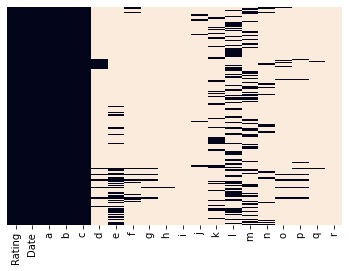

In [47]:
# Heat Map showing all of the null values needing to be cleaned at this point
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [48]:
df['d'] = df['d'].combine_first(df['e'])
df['d'] = df['d'].combine_first(df['f'])
df['d'] = df['d'].combine_first(df['g'])
df['d'] = df['d'].combine_first(df['h'])
df['d'] = df['d'].combine_first(df['i'])

In [49]:
alphModel = ['d', 'e', 'f', 'g', 'h', 'i']
for x in alphModel:
    df['c'] = np.where(df[x] == 'Outback', df[x], df['c'])
    df['c'] = np.where(df[x] == 'WRX', df[x], df['c'])
    df['c'] = np.where(df[x] == 'STI', df[x], df['c'])
    df['c'] = np.where(df[x] == 'RS', df[x], df['c'])

df.d=df.d.apply(lambda x: x if (x == 'Turbo') else np.nan)
df['d'] = df['d'].combine_first(df['e'])
df['d'] = df['d'].combine_first(df['f'])
df['d'] = df['d'].combine_first(df['g'])
df['d'] = df['d'].combine_first(df['h'])
df['d'] = df['d'].combine_first(df['i'])

alphTurb = ['e', 'f', 'g', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q']
for x in alphTurb:
    df['d'] = np.where(df[x] == 'Turbo', df[x], df['d'])

df.d=df.d.apply(lambda x: x if (x == 'Turbo') else 'Not Turbo')

alphTrans = ['j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r']
for x in alphTrans:
    df['e'] = np.where(df[x] == '4A)', df[x], df['e'])
    df['e'] = np.where(df[x] == '5M)', df[x], df['e'])
    df['e'] = np.where(df[x] == '5A)', df[x], df['e'])
    df['e'] = np.where(df[x] == '6M)', df[x], df['e'])
    df['e'] = np.where(df[x] == '6A)', df[x], df['e'])
    df['e'] = np.where(df[x] == 'CVT)', df[x], df['e'])
    
df.e=df.e.apply(lambda x: x if (x == 'CVT)' or x == '4A)' or x == '5M)' or x == '5A)' or x == '6M)' or x == '6A)') else 'NS)')

### Finally cleaning the dataframe and organizing the columns based on the data given. 

In [50]:
df[['Transmission', 'Character']] = df.e.str.split(')', expand=True)
df[['Month', 'Day', 'Year_Reviewed']] = df.Date.str.split('/', expand = True)

In [51]:
df = df.drop(['e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 'Character', 'Month', 'Day', 'Date'], axis=1)
df.Year_Reviewed = df.Year_Reviewed.apply(lambda x: '20' + x)
df = df.rename(columns={"a": "Vehicle_Year", "b": "Vehicle_Make", "c": "Vehicle_Model", 'd' : 'Turbo?'})
df = df[['Vehicle_Year', 'Vehicle_Make', 'Vehicle_Model', 'Turbo?' , 'Transmission', 'Year_Reviewed', 'Rating']]

### Here is a sample of my cleaned data

In [52]:
df[:5]

,Vehicle_Year,Vehicle_Make,Vehicle_Model,Turbo?,Transmission,Year_Reviewed,Rating
0,2006,Subaru,Baja,Not Turbo,4A,2018,5.00
1,2006,Subaru,Baja,Not Turbo,5M,2011,5.00
2,2006,Subaru,Baja,Not Turbo,4A,2010,4.25
3,2006,Subaru,Baja,Not Turbo,4A,2010,3.00
4,2006,Subaru,Baja,Turbo,5M,2010,4.00


<AxesSubplot:>

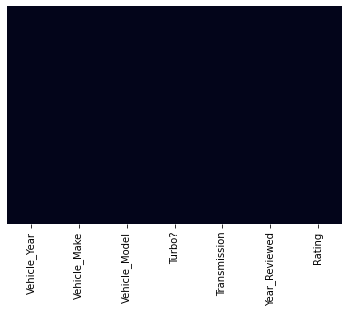

In [53]:
# Heat Map showing that all the data has been cleaned and there are no longer any null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

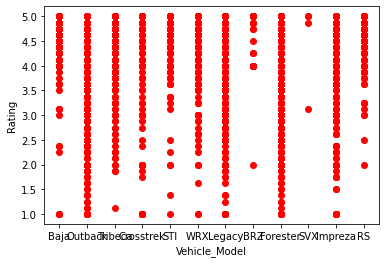

### Next I will be working on visualizations for the data and continuing on to the predictions and rest of the project

I have decided to reduce the entire data set from this point further to specifically looking at the models with the most amount of data being the Forester, Outback, Legacy, and Impreza which has subModels of the WRX, STI, and RS. The data can be applied to any specific model but the forester is the one I am most interested in as it has many different facets and attracts a multitude of people from all backgrounds. I would expect that the 2nd generation forester would be the most popular as it was the final generation in the United States to get the turbo and a manual gearbox. These ran from 2003 - 2008. I can also see the more modern versions being popular as they are great all around vehicles that every family can feel safe in while still being able to get their daily duties done. 

Interestingly enough, these models from 1995-2018 use the same engine with options for a Turbo'ed and Naturally Aspirated version, the EJ25.  The turbo'ed version makes more horsepower and torque at the sacrifice of miles per gallon and viceversa. All of the models I have chosen to compare come with AWD standard. This is good knowledge to have as knowing this means the data for reviews is based solely on driving experience and overall consumer enjoyment of the vehicle based on the body characteristics, essentially comparing the Wagon (Outback), Small SUV (Forester), and the Sedan (Impreza, there were also several years where the Impreza was built in a wagon option but it was still based ont the sedan platform). 

I am going to look to cross reference the ratings data with the year, transmission type, and whether or not it was listed as having a turbo. That final variable will be the most vague as the amount of data I have for whether or not the model has a turbo is quite limited but the difference in the feel of the vehicle is immense so I would like to keep it as a tertiary variable. 

In [14]:
df.Vehicle_Model.value_counts()

Outback      1766
Forester     1279
Legacy       1158
Impreza       599
WRX           589
Crosstrek     320
STI           263
Tribeca       233
Baja          195
RS            130
BRZ            28
SVX             4
Name: Vehicle_Model, dtype: int64

### The data below is the ratings of Foresters throughout its generations 1998-2018. 

In [15]:
dfForester = df[df.Vehicle_Model.str.contains('Forester')].sort_values(by = 'Vehicle_Year')
dfForester

,Vehicle_Year,Vehicle_Make,Vehicle_Model,Turbo?,Transmission,Year_Reviewed,Rating
4535,1998,Subaru,Forester,Not Turbo,NS,2009,2.125
4554,1998,Subaru,Forester,Not Turbo,NS,2006,4.125
4553,1998,Subaru,Forester,Not Turbo,NS,2006,4.250
4552,1998,Subaru,Forester,Not Turbo,NS,2006,3.875
4551,1998,Subaru,Forester,Not Turbo,NS,2006,4.250
...,...,...,...,...,...,...,...
3827,2018,Subaru,Forester,Not Turbo,CVT,2018,5.000
3826,2018,Subaru,Forester,Not Turbo,CVT,2018,5.000
3825,2018,Subaru,Forester,Not Turbo,CVT,2018,5.000
3840,2018,Subaru,Forester,Not Turbo,CVT,2017,5.000


### Forester - Vehicle Year - Transmission type

Interestingly enough we can see that the 2008 model has a peak rating with the 5 speed manual just barely above the 4 speed automatic, which is right on for our predictions. We can also see that the more modern Foresters using the 6 speed manual have great ratings reaching above the ones with the CVT. However, it seems that there was a dip just before its 2018 high which could be an outlier looking at the rest of the graph. 

The drop in ratings from 2009 to 2014, I would predict to be because after 2008, you could no longer get one with a manual and a turbo. Lets cross reference vehicle year and turbo status next!

<AxesSubplot:xlabel='Vehicle_Year'>

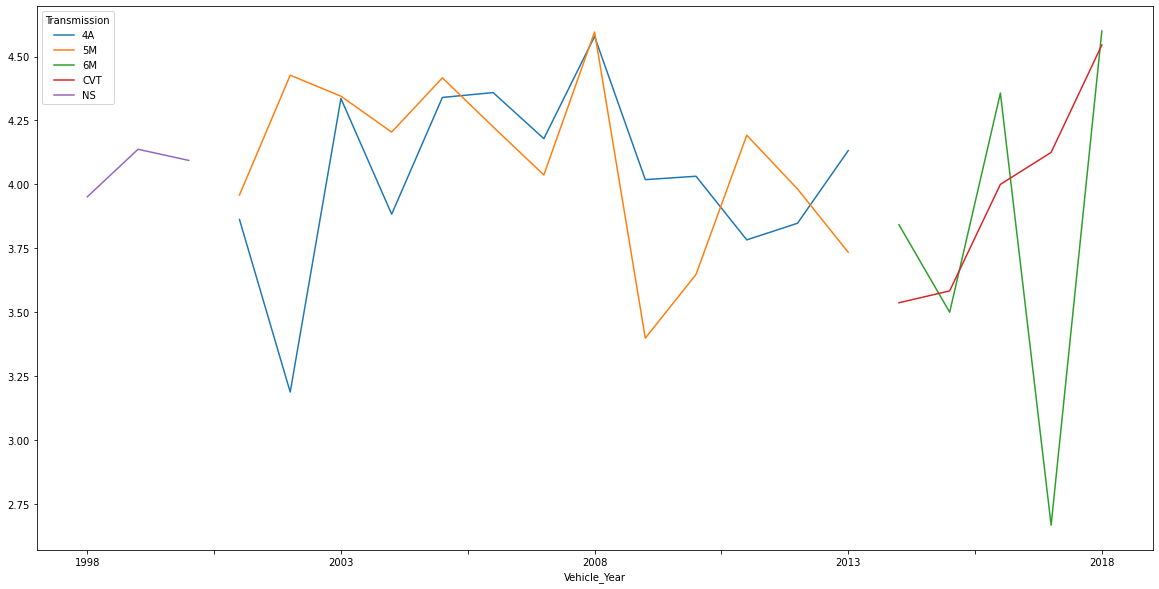

In [16]:
# df2 = df.groupby(['Vehicle_Year', 'Vehicle_Model'])['Rating'].mean().unstack('Vehicle_Model')
dfForesterTrans = dfForester.groupby(['Vehicle_Year', 'Transmission'])['Rating'].mean().unstack('Transmission')
dfForesterTrans.plot(stacked=False, figsize = (20,10))

### Forester - Vehicle Year - Turbo Status

Completely opposite of my predictions as it looks like the Turbo Foresters with an automatic transmission had a major peak in ratings in 2013. This was the beginning of Subaru's 4th generation starting in 2014. This was also the year Subaru debuted X-Mode and EyeSight Driver Assistance bringing about an era of safety oriented fuel saving Foresters. However, you could no longer get one with the turbo and 5 speed manual so the market for buyers in the United States has shifted from auto enthusiasts to family drivers. 

<AxesSubplot:xlabel='Vehicle_Year'>

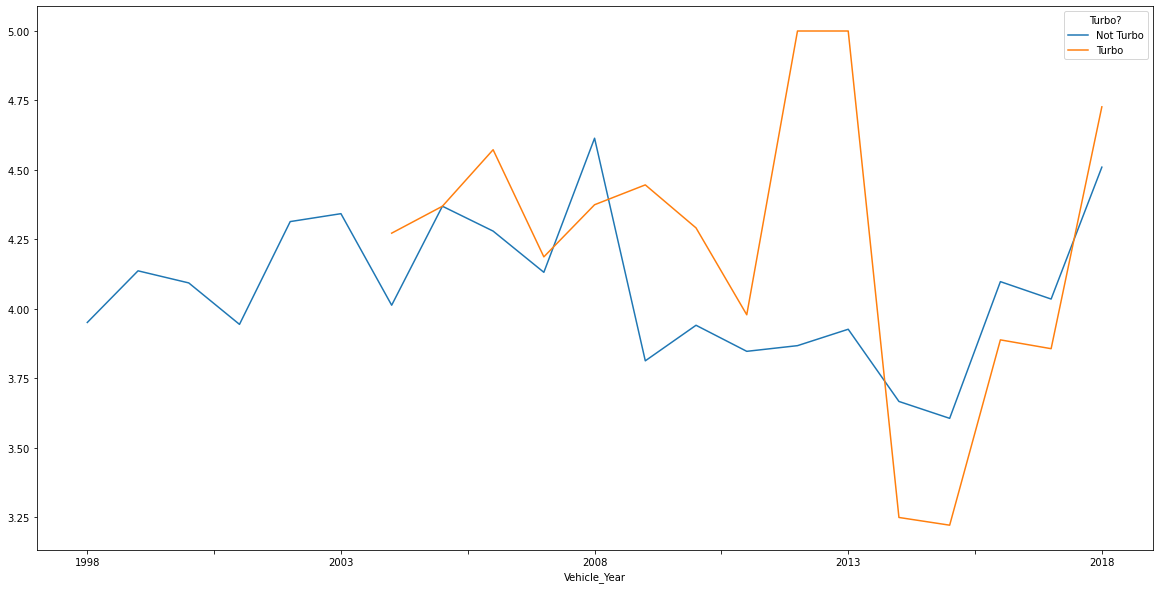

In [17]:
dfForesterTurbo = dfForester.groupby(['Vehicle_Year', 'Turbo?'])['Rating'].mean().unstack('Turbo?')
dfForesterTurbo.plot(stacked=False, figsize = (20,10))

### The data below is the ratings of Outbacks throughout its generations 1997-2018. 

In [18]:
dfOutback = df[df.Vehicle_Model.str.contains('Outback')].sort_values(by = 'Vehicle_Year')
dfOutback

,Vehicle_Year,Vehicle_Make,Vehicle_Model,Turbo?,Transmission,Year_Reviewed,Rating
2997,1997,Subaru,Outback,Not Turbo,NS,2005,4.625
3005,1997,Subaru,Outback,Not Turbo,NS,2004,4.625
3006,1997,Subaru,Outback,Not Turbo,NS,2004,4.625
3007,1997,Subaru,Outback,Not Turbo,NS,2004,4.875
3009,1997,Subaru,Outback,Not Turbo,NS,2004,2.500
...,...,...,...,...,...,...,...
625,2018,Subaru,Outback,Not Turbo,CVT,2018,5.000
626,2018,Subaru,Outback,Not Turbo,CVT,2018,4.000
627,2018,Subaru,Outback,Not Turbo,CVT,2018,5.000
621,2018,Subaru,Outback,Not Turbo,CVT,2018,5.000


### Outback - Vehicle Year - Transmission type

When researching the consumer base for the Outback we tend to see a different crowd than the foresters and the Impreza models. The Outback is more of a wagon than a small SUV and its customer base is interested in overall driveability and daily useage rather than performance modifcations or off road capability. We can see the charts below find that the late 2000s era models were pretty popular no matter what their transmission type was but after 2012, we can see that the automatic transmissions and the CVT data are on the rise. This would assume that Subaru discontinued the 5speed manual versions of these vehicles to keep the vehicle more inline with its customer base. Lets look at the data regarding turbo'ed outbacks. 


<AxesSubplot:xlabel='Vehicle_Year'>

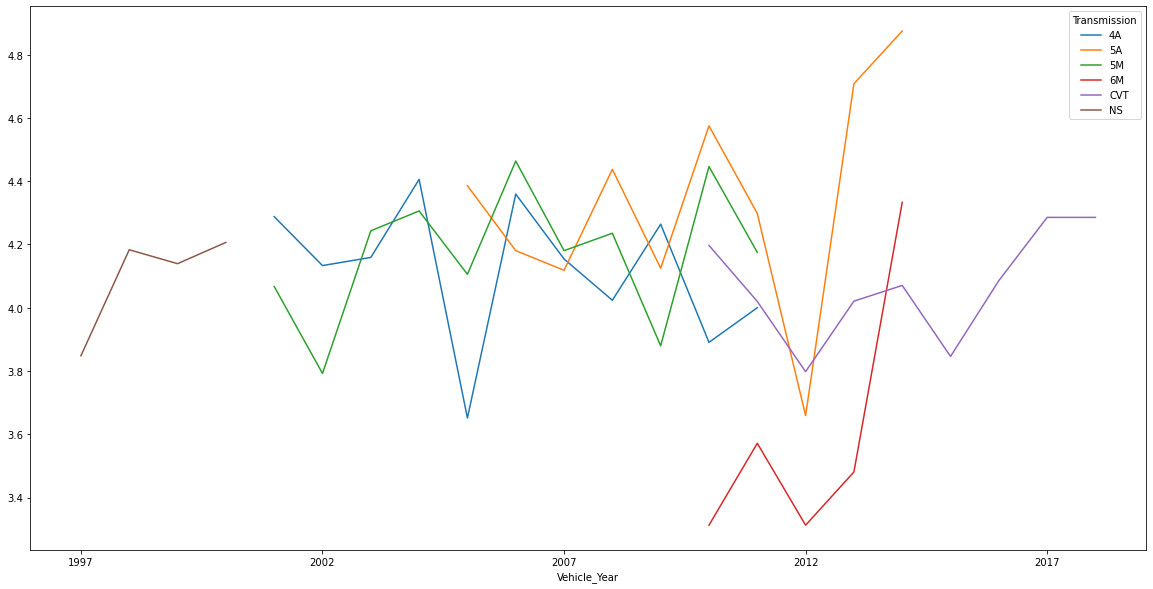

In [19]:
dfOutbackTrans = dfOutback.groupby(['Vehicle_Year', 'Transmission'])['Rating'].mean().unstack('Transmission')
dfOutbackTrans.plot(stacked=False, figsize = (20,10))

### Outback - Vehicle Year - Turbo Status

Funny enough, the Outbacks with turbos had the greatest ratings in 2008 which lines up with our predictions about the foresters, these EJ25 Turbo'ed engines seem to be quite a favorite in these vehicles in the late 2000s. The turbo was removed for the later generations but the Outback still remains a popular vehicle as the graph shows the ratings improvement towards 2018. 

<AxesSubplot:xlabel='Vehicle_Year'>

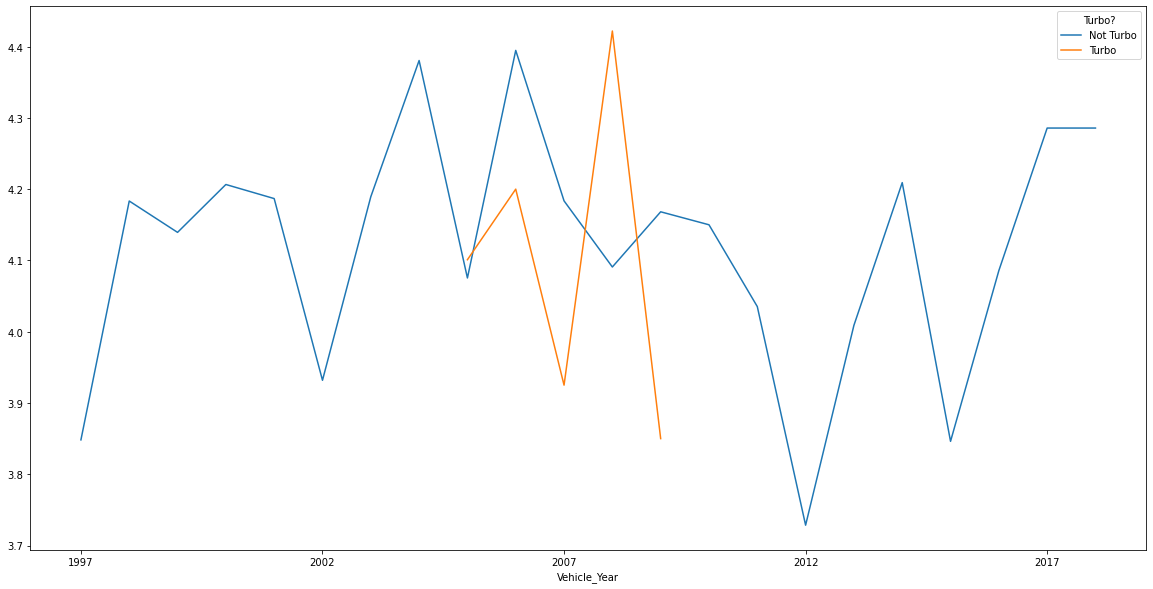

In [20]:
dfOutbackTurbo = dfOutback.groupby(['Vehicle_Year', 'Turbo?'])['Rating'].mean().unstack('Turbo?')
dfOutbackTurbo.plot(stacked=False, figsize = (20,10))

### The data below is the ratings of Legacys throughout its generations 1997-2018. 

The Legacy is an intersting model for the Subaru platform as it is a 4 door sedan built for comfort rather than the Forester's small SUV, the Outback's wagon, or the Impreza's performance vehicles. However, the Legacy was not forgotten about and was packed with the same EJ25 engine and was enjoyed by many. 

In [21]:
dfLegacy = df[df.Vehicle_Model.str.contains('Legacy')].sort_values(by = 'Vehicle_Year')
dfLegacy

,Vehicle_Year,Vehicle_Make,Vehicle_Model,Turbo?,Transmission,Year_Reviewed,Rating
3031,1997,Subaru,Legacy,Not Turbo,NS,2002,4.375
2973,1997,Subaru,Legacy,Not Turbo,NS,2002,3.125
2975,1997,Subaru,Legacy,Not Turbo,NS,2016,1.000
2983,1997,Subaru,Legacy,Not Turbo,NS,2009,3.875
2984,1997,Subaru,Legacy,Not Turbo,NS,2009,3.750
...,...,...,...,...,...,...,...
2484,2018,Subaru,Legacy,Not Turbo,CVT,2017,2.000
2483,2018,Subaru,Legacy,Not Turbo,CVT,2017,5.000
2482,2018,Subaru,Legacy,Not Turbo,CVT,2017,5.000
2474,2018,Subaru,Legacy,Not Turbo,CVT,2018,2.000


### Legacy - Vehicle Year - Transmission type

Looking at the graph below we can see that the ratings for the Legacy closely follow the previous models in that they are very popular with the 5 or 6 speed manuals in the late 2000s and early 2010s. However, the Legacy's manual transmission was removed from the vehicle and is now only offered with a CVT which keeps it in line with the concept for the vehicle, AWD safe fuel efficient sedan. Enthusiasts seemed to have moved elseware after the removal of the manual transmission. 


<AxesSubplot:xlabel='Vehicle_Year'>

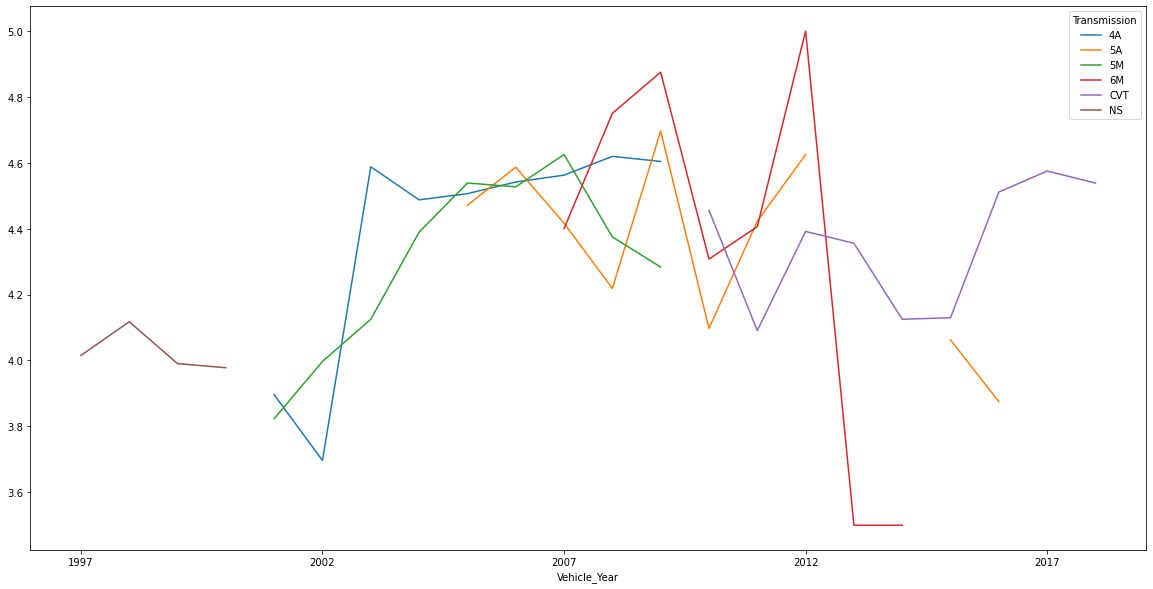

In [22]:
dfLegacyTrans = dfLegacy.groupby(['Vehicle_Year', 'Transmission'])['Rating'].mean().unstack('Transmission')
dfLegacyTrans.plot(stacked=False, figsize = (20,10))

### Legacy - Vehicle Year - Turbo Status

This graph shows that the Legacy's turbo'ed engine variant was more popular than the naturally aspirated version and could have continued to be popular for those looking for a city life sedan with all of the creature comforts but still retaining the punch of a turbo. The ratings are still quite high with the naturally aspirated models but the turbo versions have been left to the dust and owners will need to look elseware for the time being. 

<AxesSubplot:xlabel='Vehicle_Year'>

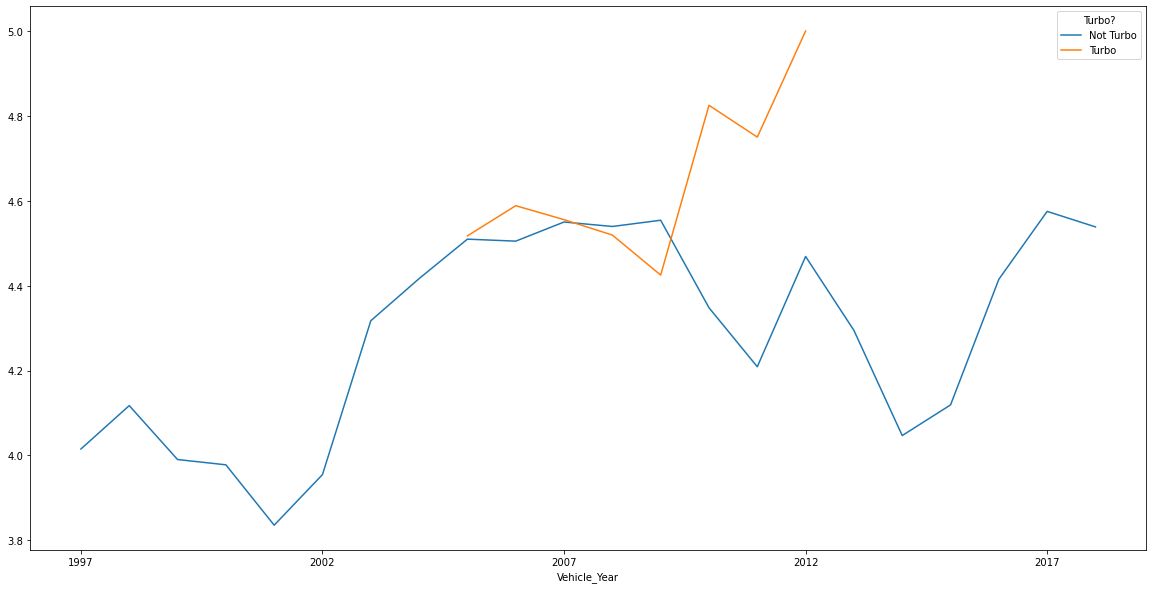

In [23]:
dfLegacyTurbo = dfLegacy.groupby(['Vehicle_Year', 'Turbo?'])['Rating'].mean().unstack('Turbo?')
dfLegacyTurbo.plot(stacked=False, figsize = (20,10))

### The data below is the ratings of Imprezas throughout its generations 1997-2018.

We can break it down into 4 subcategories the standard Impreza, WRX, STI, and RS. The Impreza is one of the most intersting sets of data as it is the basis for all of the other models in this comparison. The impreza chasis and drivetrain are used on the other models with only changes in body style. Moving forward, the Impreza began to evolve itself with submodels of its own, the RS, WRX, and STI. First we will compare the data with 3 of these models combined and then look at them individually. We will skip the detailed look at the RS as the dataset is quite small.

In [24]:
dfImprezaALL = df[df.Vehicle_Model.str.contains('Impreza|WRX|STI|RS')].sort_values(by = 'Vehicle_Year')
dfImprezaALL

,Vehicle_Year,Vehicle_Make,Vehicle_Model,Turbo?,Transmission,Year_Reviewed,Rating
6213,1997,Subaru,Impreza,Not Turbo,NS,2004,4.625
6214,1997,Subaru,Impreza,Not Turbo,NS,2003,4.625
6216,1997,Subaru,Impreza,Not Turbo,NS,2013,4.125
6219,1997,Subaru,Impreza,Not Turbo,NS,2010,4.875
6221,1997,Subaru,Impreza,Not Turbo,NS,2009,3.750
...,...,...,...,...,...,...,...
5521,2018,Subaru,Impreza,Not Turbo,CVT,2018,3.000
5520,2018,Subaru,Impreza,Not Turbo,CVT,2018,5.000
5519,2018,Subaru,Impreza,Not Turbo,CVT,2018,5.000
4786,2018,Subaru,STI,Turbo,6M,2018,5.000


### ImprezaALL - Vehicle Year - Transmission type

Following previous predictions, the Imprezas from roughly 2002 to 2008 had great ratings nomatter their transmission type but took a hit in their next generation around 2012. This was when Subaru gave the WRX and STI their own production lines and the ratings began to increase as buyers could get specific factory setups depending on their desires. The standard Impreza is a sportier version of the Legacy while the WRX and STI are sportier still, with the RS being the first production version of the Impreza. 

<AxesSubplot:xlabel='Vehicle_Year'>

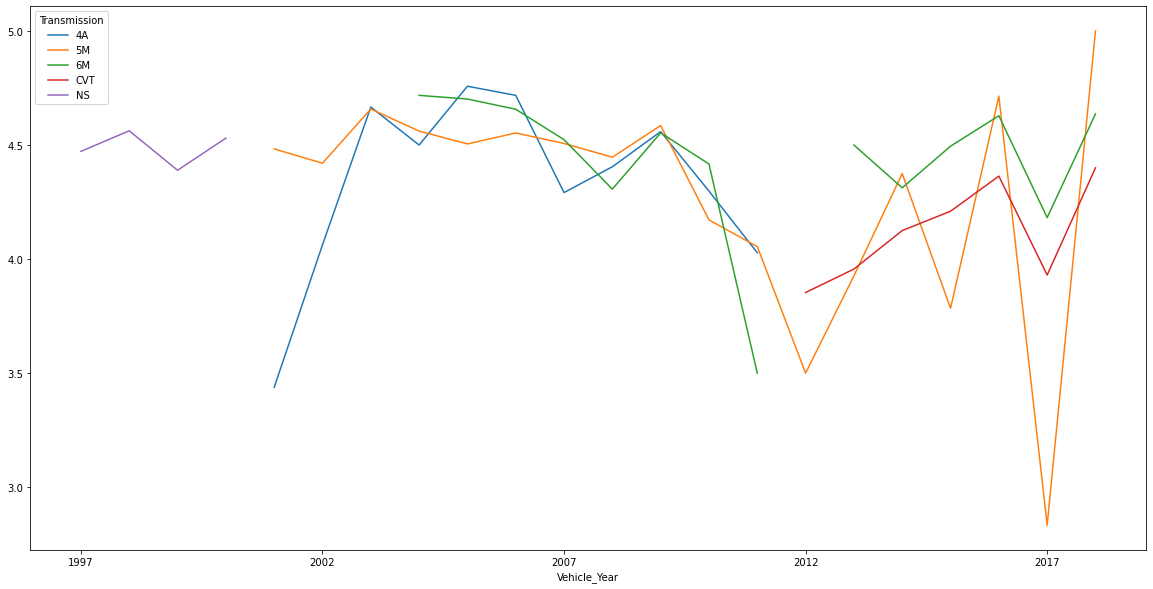

In [25]:
dfImprezaALLTrans = dfImprezaALL.groupby(['Vehicle_Year', 'Transmission'])['Rating'].mean().unstack('Transmission')
dfImprezaALLTrans.plot(stacked=False, figsize = (20,10))

### ImprezaALL - Vehicle Year - Turbo Status

This chart is possibly one of the most intersting ones as we can seee the vast difference between turbo'd and naturally aspirated Imprezas. Buyers looking for the Impreza are interested in a performance oriented vehicle and the ones that purchased the turbo option were highly satisfied as we can see the turbo modeld ratings are continuously above those that are naturally aspirated. 

<AxesSubplot:xlabel='Vehicle_Year'>

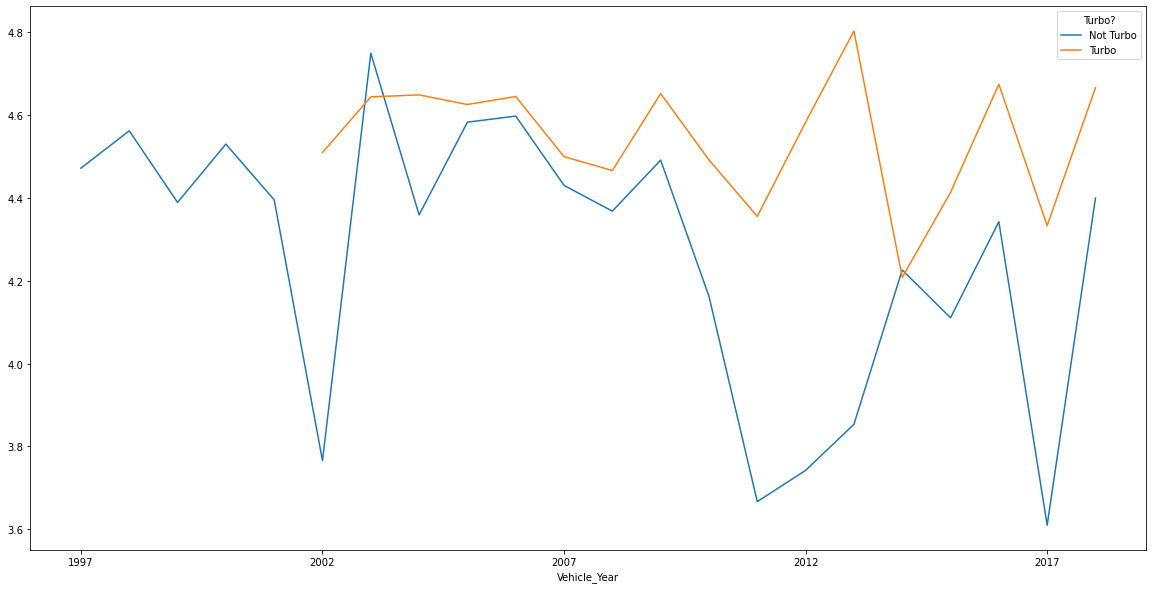

In [26]:
dfImprezaALLTurbo = dfImprezaALL.groupby(['Vehicle_Year', 'Turbo?'])['Rating'].mean().unstack('Turbo?')
dfImprezaALLTurbo.plot(stacked=False, figsize = (20,10))

### Specifically the Impreza 1997-2018

When looking at specifically the Impreza, the base model, there was not an option for a turbo as then it would have become classified as the WRX or STI. There were however still different transmission setups available.

In [27]:
dfImpreza = df[df.Vehicle_Model.str.contains('Impreza')].sort_values(by = 'Vehicle_Year')
dfImpreza

,Vehicle_Year,Vehicle_Make,Vehicle_Model,Turbo?,Transmission,Year_Reviewed,Rating
6238,1997,Subaru,Impreza,Not Turbo,NS,2004,4.875
6213,1997,Subaru,Impreza,Not Turbo,NS,2004,4.625
6214,1997,Subaru,Impreza,Not Turbo,NS,2003,4.625
6216,1997,Subaru,Impreza,Not Turbo,NS,2013,4.125
6219,1997,Subaru,Impreza,Not Turbo,NS,2010,4.875
...,...,...,...,...,...,...,...
5514,2018,Subaru,Impreza,Not Turbo,CVT,2018,2.000
5515,2018,Subaru,Impreza,Not Turbo,CVT,2018,4.000
5519,2018,Subaru,Impreza,Not Turbo,CVT,2018,5.000
5518,2018,Subaru,Impreza,Not Turbo,CVT,2018,5.000


### Impreza - Vehicle Year - Transmission type

This graph shows the same predictions that the Imprezas were the most popular from 2002 - 2008, taking a dip in 2012, then returning back in 2018. This is becoming an intersting trend!

<AxesSubplot:xlabel='Vehicle_Year'>

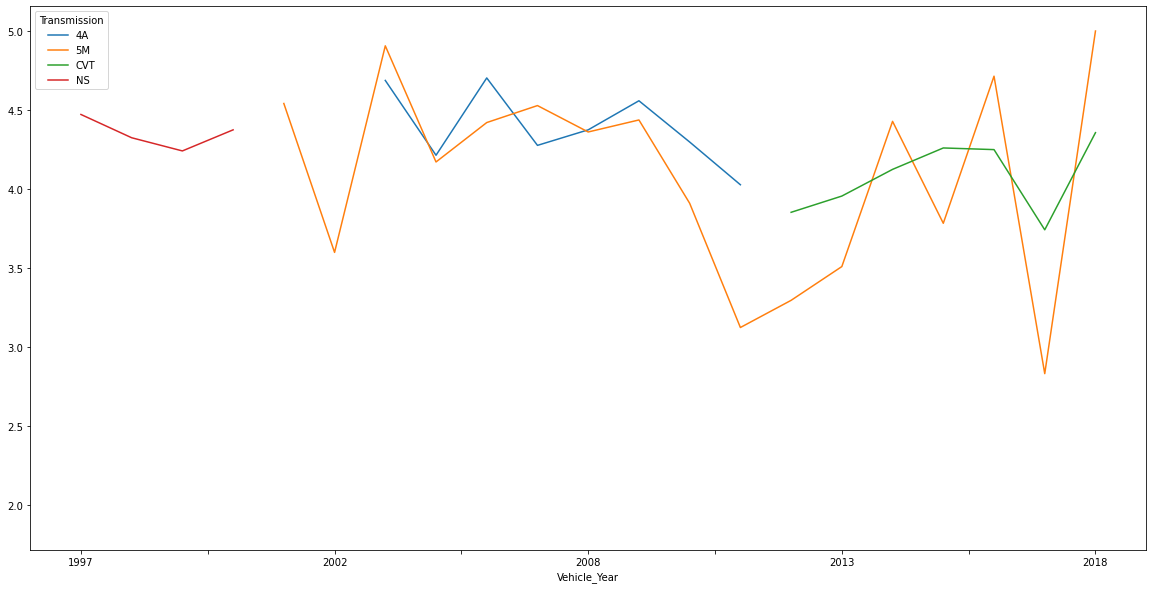

In [28]:
dfImprezaTrans = dfImpreza.groupby(['Vehicle_Year', 'Transmission'])['Rating'].mean().unstack('Transmission')
dfImprezaTrans.plot(stacked=False, figsize = (20,10))

### Impreza - Vehicle Year - Turbo Status

Even with all of the Imprezas, regardless of their transmission type, not having a turbo, we can still see the same pattern in the ratings. 

<AxesSubplot:xlabel='Vehicle_Year'>

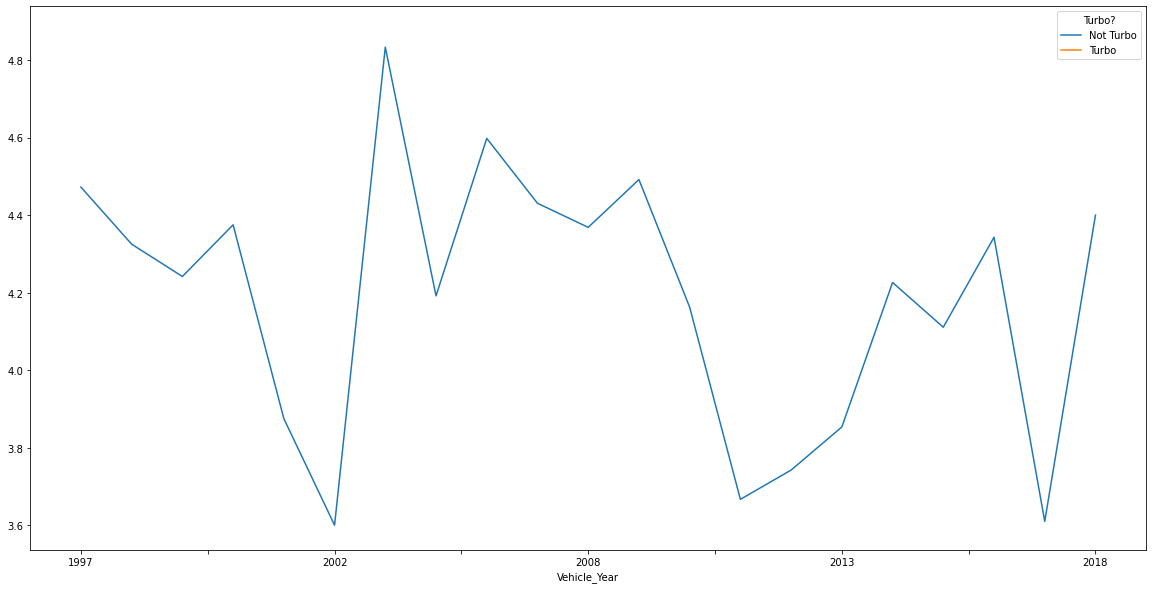

In [29]:
dfImprezaTurbo = dfImpreza.groupby(['Vehicle_Year', 'Turbo?'])['Rating'].mean().unstack('Turbo?')
dfImprezaTurbo.plot(stacked=False, figsize = (20,10))

### Specifically the ImprezaWRX 2002-2018

The WRX was the major performance oriented Impreza stemming from the RS rendition. It eventually was given its own production line and titled as simply the WRX and has been immensely popular amongst subaru enthusiasts.

In [30]:
dfImprezaWRX = df[df.Vehicle_Model.str.contains('WRX')].sort_values(by = 'Vehicle_Year')
dfImprezaWRX

,Vehicle_Year,Vehicle_Make,Vehicle_Model,Turbo?,Transmission,Year_Reviewed,Rating
6105,2002,Subaru,WRX,Turbo,5M,2004,4.750
6133,2002,Subaru,WRX,Turbo,5M,2003,2.625
6134,2002,Subaru,WRX,Turbo,5M,2003,4.500
6136,2002,Subaru,WRX,Turbo,5M,2003,1.625
6137,2002,Subaru,WRX,Turbo,5M,2003,4.625
...,...,...,...,...,...,...,...
4793,2018,Subaru,WRX,Turbo,CVT,2018,5.000
4794,2018,Subaru,WRX,Turbo,6M,2018,5.000
4796,2018,Subaru,WRX,Turbo,6M,2017,5.000
4791,2018,Subaru,WRX,Turbo,6M,2018,5.000


### ImprezaWRX - Vehicle Year - Transmission type

This graph is pretty intersting as the 4 speed automatic held popularity for the first few years of production as well as the CVT versions being the most popular in recent years. Being that the WRX is a performance vehicle, I would assume that its buyers would be dead set on getting the manual transmissions rather than an automatic or a CVT. It could be possible that they wanted the WRX rather than the STI as it is still performance oriented but not so much as the STI so the CVT with its fuel savings and ease of driving retains consumer appeal.

<AxesSubplot:xlabel='Vehicle_Year'>

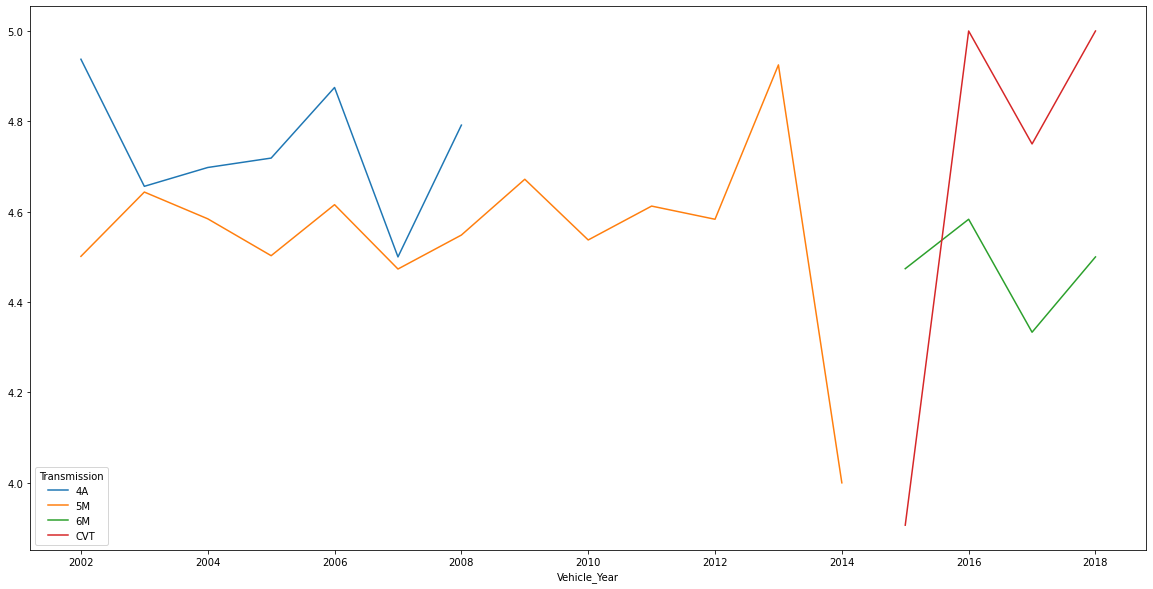

In [31]:
dfImprezaWRXTrans = dfImprezaWRX.groupby(['Vehicle_Year', 'Transmission'])['Rating'].mean().unstack('Transmission')
dfImprezaWRXTrans.plot(stacked=False, figsize = (20,10))

### ImprezaWRX - Vehicle Year - Turbo Status

The WRX's EJ25 comes with the turbo which is why we don't see the Naturally Aspirated versions in this graph but we do see a break in the trend as models in the 2012/2013 range had the highest ratings. 2014 was the last year that the WRX was offered in the Hatchback trim which is also interesting as at that point we see the lowest ratings. 

<AxesSubplot:xlabel='Vehicle_Year'>

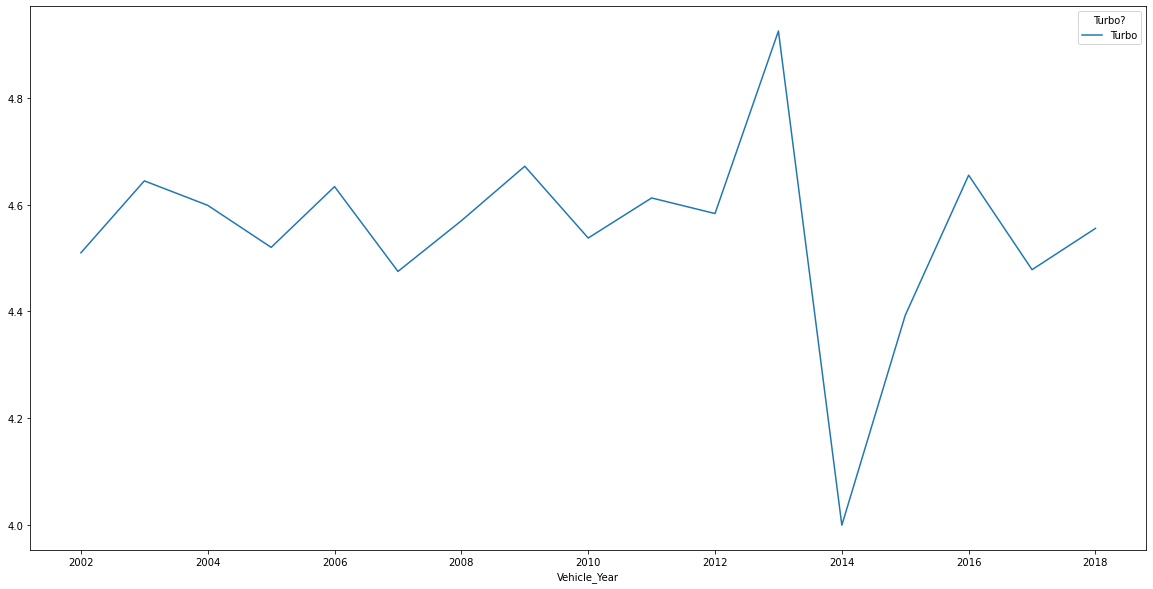

In [32]:
dfImprezaWRXTurbo = dfImprezaWRX.groupby(['Vehicle_Year', 'Turbo?'])['Rating'].mean().unstack('Turbo?')
dfImprezaWRXTurbo.plot(stacked=False, figsize = (20,10))

### Specifically the ImprezaSTI 2004-2018

The STI is a submodel of the WRX, one with all of the performance addons and standard with a 6 speed manual and a turbo. A very higly rated and sought after vehicle since Subaru's championship win at the World Rally Competition in the early 2000s. This was when the STI was released into the American market and gained a following since. 

In [33]:
dfImprezaSTI = df[df.Vehicle_Model.str.contains('STI')].sort_values(by = 'Vehicle_Year')
dfImprezaSTI

,Vehicle_Year,Vehicle_Make,Vehicle_Model,Turbo?,Transmission,Year_Reviewed,Rating
5230,2004,Subaru,STI,Turbo,6M,2004,4.750
5223,2004,Subaru,STI,Turbo,6M,2004,5.000
5222,2004,Subaru,STI,Turbo,6M,2004,4.875
5221,2004,Subaru,STI,Turbo,6M,2004,5.000
5220,2004,Subaru,STI,Turbo,6M,2004,4.375
...,...,...,...,...,...,...,...
4799,2017,Subaru,STI,Turbo,6M,2017,5.000
4797,2017,Subaru,STI,Turbo,6M,2018,2.000
4785,2018,Subaru,STI,Turbo,6M,2018,5.000
4786,2018,Subaru,STI,Turbo,6M,2018,5.000


### ImprezaSTI - Vehicle Year - Transmission type

We see the same trend here as in most of the other graphs that the STI was very popular from 2004 until 2010, but took a dip in 2012, then returned back in the late 2010s. Since all STI's come with a Manual transmission and a Turbo, the next two graphs are identical.

<AxesSubplot:xlabel='Vehicle_Year'>

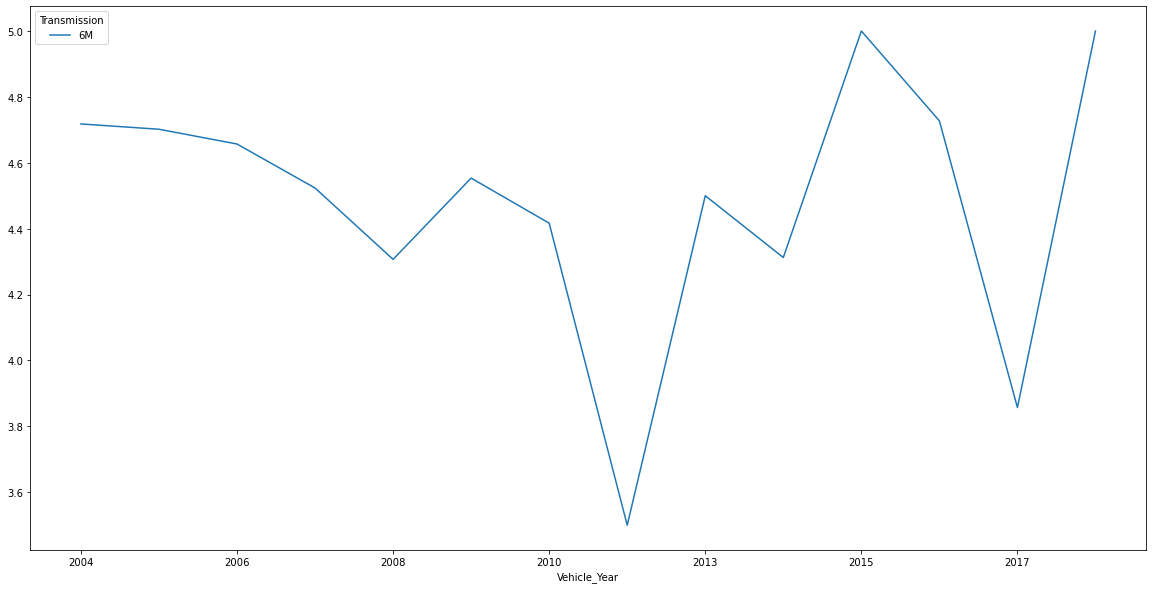

In [34]:
dfImprezaSTITrans = dfImprezaSTI.groupby(['Vehicle_Year', 'Transmission'])['Rating'].mean().unstack('Transmission')
dfImprezaSTITrans.plot(stacked=False, figsize = (20,10))

### ImprezaSTI - Vehicle Year - Turbo Status

<AxesSubplot:xlabel='Vehicle_Year'>

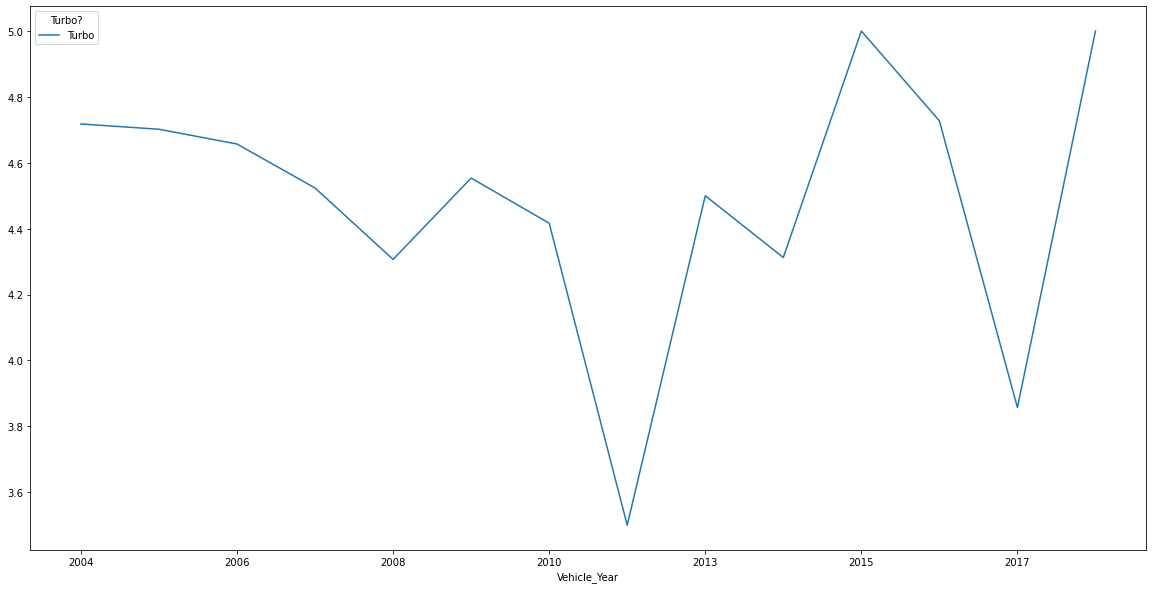

In [35]:
dfImprezaSTITurbo = dfImprezaSTI.groupby(['Vehicle_Year', 'Turbo?'])['Rating'].mean().unstack('Turbo?')
dfImprezaSTITurbo.plot(stacked=False, figsize = (20,10))

## Preliminary Findings

It seems quite interesting that no matter the model, transmission type, turbo'ed or not, the ratings took a dive in 2012 across the board. However, our predictions were correct in that the most popular year range for any model was between 2002-2008 and then again closer to 2018. When looking at the history of these models in the Subaru lineup, the generation of 2002-2008 are very popular amongst enthusiasts as parts availabily for the engines is immense and tuneability for this era of the EJ25 is ample. This was before Subaru, and many other manufacturers for that matter, started implementing a multitude of computers and other software into the vehicles creating difficulty for the home enthusiast. This could be the explanation for the drop in popularity in the early 2010s, however the late models seem to have regained popularity as many of the added features have become quite dialed in. 

## Plans for Model Approach

Based on the findings from the EDA above, it seems that it would be good to try to determine the reason for the drop in ratings surrounding the 2012 models and I belive it would be good to look at the ratings for that year as time progressed to see if consumers experienced a shock when certain features were removed as the new model came out or if that year continued to be unpopular as time progressed. 

I will narrow down the data further and look at the 2008 data, 2012 data, and 2018 data on ratings over time to see the trends of those graphs and gain more insight. 

The graphs below represent data for all models from 2003-2008 for dfEarly, 2009-2014 for dfMid, and 2015-2018 for dfLate

<AxesSubplot:ylabel='Frequency'>

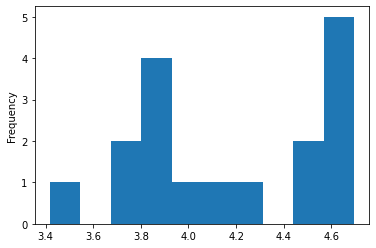

In [121]:
dfEarly = df.loc[(df['Vehicle_Year'] == '2003') | (df['Vehicle_Year'] == '2004') | (df['Vehicle_Year'] == '2005') | (df['Vehicle_Year'] == '2006') | (df['Vehicle_Year'] == '2007') | (df['Vehicle_Year'] == '2008')]
dfEarly = dfEarly.drop(['Vehicle_Make', 'Vehicle_Year'], axis=1)

dfEarly = dfEarly.sort_values(by=['Year_Reviewed'])


dfEarly = dfEarly.groupby(['Year_Reviewed'])['Rating'].mean()

dfEarly.plot.hist()

<AxesSubplot:ylabel='Frequency'>

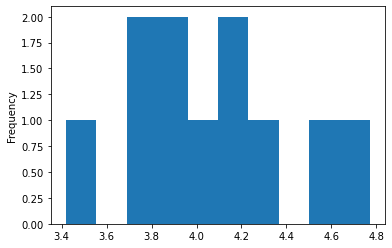

In [122]:
dfMid = df.loc[(df['Vehicle_Year'] == '2009') | (df['Vehicle_Year'] == '2010') | (df['Vehicle_Year'] == '2011') | (df['Vehicle_Year'] == '2012') | (df['Vehicle_Year'] == '2013') | (df['Vehicle_Year'] == '2014')]
dfMid = dfMid.drop(['Vehicle_Make', 'Vehicle_Year'], axis=1)

dfMid = dfMid.sort_values(by=['Year_Reviewed'])


dfMid = dfMid.groupby(['Year_Reviewed'])['Rating'].mean()

dfMid.plot.hist()

<AxesSubplot:ylabel='Frequency'>

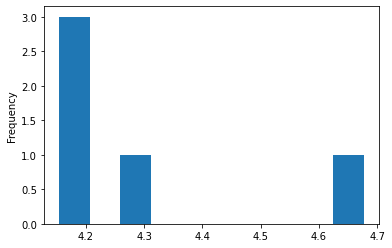

In [124]:
dfLate = df.loc[(df['Vehicle_Year'] == '2015') | (df['Vehicle_Year'] == '2016') | (df['Vehicle_Year'] == '2017') | (df['Vehicle_Year'] == '2018')]
dfLate = dfLate.drop(['Vehicle_Make', 'Vehicle_Year'], axis=1)

dfLate = dfLate.sort_values(by=['Year_Reviewed'])


dfLate = dfLate.groupby(['Year_Reviewed'])['Rating'].mean()

dfLate.plot.hist()

### Conclusion

Once again, we can see here that the ratings for the 2003 - 2008 range of models no matter the turbo status or transmission type are the ones that continuously have the highest ratings over time and in general. Time will tell how the future of these vehicles will end up in the consumer eye. No matter who we are, we all have a preference in some type of vehicle. Each different aspect drives our own interest and will result in a purchase of something catered to our own likings. I find it incredibly important to do a thorough investigation throughout all of the different makes and models comparing as many aspects as possible when making the decision to finally purchase a vehicle. 

I could definitely take this project further but at this time I feel that I need assistance in guiding my data and building the project in detail. Hopefully you enjoyed what I have put together so far and will make the best choices in your future vehicle purchases with regards to your own likings!

Best,

Ron